# COMP 7150 Assignment 6

Due: April 17, 2023 before midnight.

NAME: _______________

---

**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

#### Dataset

The dataset you'll used for this assignment is diabetes.csv

The target variable is Outcome. The other 8 variables are features.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)


---

Each problem is worth 20 points.

---

In [1]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('./../Sem_2/Diabetes/diabetes.csv')
diabetes.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
397,0,131,66,40,0,34.3,0.196,22,1
707,2,127,46,21,335,34.4,0.176,22,0
215,12,151,70,40,271,41.8,0.742,38,1


---

**Problem 1**

Some of the features have missing values.  Unfortunately, in this dataset, missing values are not indicated as "nan".  Therefore, if you use pandas' "dropna", it won't work.

However, if you understand the meanings of the features, you can guess which ones have missing values.  For example, blood pressure should not be less than 20.

Find the features that you think have missing values in the dataset.  For each feature, explain why you think they have missing values.



In [2]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The columns Glucose, BloodPressure, SkinThickness, Insulin and BMI contain missing values
1) Min value of glucose level is 40mg/dl and the values < 40 are considered missing
2) Min value for BloodPressure is 20 and values < 20 considered missing
3) Min and Max values for SkinThickness is 10 and 60 and values <10 and >60 are missing
4) Min for Insulin is 15 values < 15 considered missing
5) BMI cannt be zero (because it implies weight is 0 which is not feasible)

---

**Problem 2**

Remove the missing values from the diabetes dataset.

Find 3 decision models with the best F1 scores, based on these characteristics:
* The first model: find the best max_depth.
* The second model: find the best min_samples_leaf
* The third model: find the best combination of max_depth and min_samples_leaf

Evaluate your models using f1_score and ShuffleSplit with 100 splits.

You can read about these two parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [3]:
diabetes.loc[diabetes['Glucose']<40,'Glucose']=np.nan
diabetes.loc[diabetes['BloodPressure']<20,'BloodPressure']=np.nan
diabetes.loc[diabetes['Insulin']<15,'Insulin']=np.nan
diabetes.loc[diabetes['BMI']==0,'BMI']=np.nan
diabetes.loc[((diabetes['SkinThickness']<10) | (diabetes['SkinThickness']>60)),'SkinThickness']=np.nan

In [4]:
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               233
Insulin                     375
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Removing the observations that are less than 5% of the total values ie. 38

cols_subset=[]
cols=diabetes.isna().sum().index.tolist()
missing_counts=diabetes.isna().sum().values.tolist()
for i in range(len(cols)):
    if(missing_counts[i]<=threshold and missing_counts[i]!=0):
        cols_subset.append(cols[i])

print(cols_subset)

In [5]:
threshold=int(0.05*diabetes.shape[0])
cols_df=pd.DataFrame(diabetes.isna().sum(),columns=['missing_count'])
cols_df['remove_rows']=cols_df['missing_count'].apply(lambda x : 'Yes' if(x<=threshold and x!=0) else 'No')
subset_cols=cols_df[cols_df['remove_rows']=='Yes'].index.tolist()
subset_cols

['Glucose', 'BloodPressure', 'BMI']

In [6]:
diabetes.dropna(subset=subset_cols,inplace=True)

In [16]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Let us verify the distribution of the columns SkinThickness and Insulin to find out which metric is used to impute the values.

<Axes: xlabel='Insulin', ylabel='Density'>

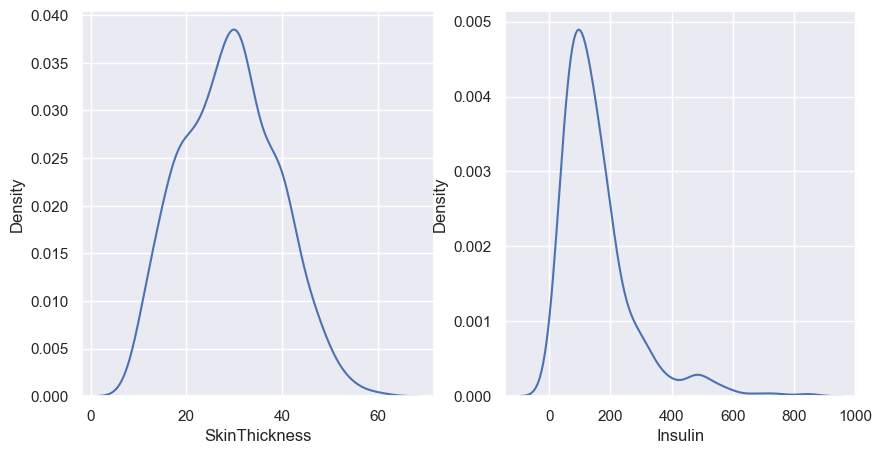

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,5)
sns.kdeplot(data=diabetes,x='SkinThickness',ax=ax[0])
sns.kdeplot(data=diabetes,x='Insulin',ax=ax[1])

From the above plots 
1) SkinThickness is almost normal hence imputing the NaN values with mean
2) Insulin is skewed to the right hence median is the better choice to impute the column

In [14]:
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].mean(),inplace=True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(),inplace=True)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit

model_1_params={'max_depth':np.arange(1,30,5)}
model_2_params={'min_samples_leaf':np.arange(1,100,3)}
model_3_params={'max_depth':np.arange(1,30,5),'min_samples_leaf':np.arange(1,100,3)}

decision=DecisionTreeClassifier()
shuffle=ShuffleSplit(n_splits=100,random_state=True,test_size=0.2)

features=diabetes.drop(['Outcome'],axis=1)
target=diabetes['Outcome']

model_1=GridSearchCV(decision,cv=shuffle,scoring='f1',param_grid=model_1_params)
model_1.fit(features,target)
print('---------  Model 1 --------')
print(f'Best parameters of model 1 is {model_1.best_params_}')
print(f'Best score of model 1 is {model_1.best_score_}')
print('\n')
model_2=GridSearchCV(decision,cv=shuffle,scoring='f1',param_grid=model_2_params)
model_2.fit(features,target)
print('---------  Model 2 --------')
print(f'Best parameters of model 2 is {model_2.best_params_}')
print(f'Best score of model 2 is {model_2.best_score_}')
print('\n')
model_3=GridSearchCV(decision,cv=shuffle,scoring='f1',param_grid=model_3_params)
model_3.fit(features,target)
print('---------  Model 3 --------')
print(f'Best parameters of model 3 is {model_3.best_params_}')
print(f'Best score of model 3 is {model_3.best_score_}')

---------  Model 1 --------
Best parameters of model 1 is {'max_depth': 6}
Bets score of model 1 is 0.5926681294223471


---------  Model 2 --------
Best parameters of model 2 is {'min_samples_leaf': 58}
Bets score of model 2 is 0.6375980594753587


---------  Model 3 --------
Best parameters of model 3 is {'max_depth': 6, 'min_samples_leaf': 58}
Bets score of model 3 is 0.6375980594753587


---
**Problem 3**

Compare the performance of the best decision tree classifier and a random forest (with similar max_depth and min_samples_leaf).


In [23]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier()
params_forest=model_3.best_params_

for key,value in params_forest.items():
    params_forest[key]=[value]

forest_cv=GridSearchCV(forest,cv=shuffle,param_grid=params_forest,scoring='f1')
forest_cv.fit(features,target)

print(f'Best score of Random Forest with same parameters as Decision Tree is {model_3.best_score_}')

Bets score of Random Forest with same parameters as Decision Tree is 0.6375980594753587


---
**Problem 4**

By default, a random forest classifier uses 100 random trees (n_estimators). The larger the number of random trees, the longer it takes to train and predict.

What is the smallest number random trees in a random forest do you need for a random forest classifer to outperform your best decision tree classifier?


In [35]:
params_forest_new={'n_estimators':np.arange(100,500,10),'max_depth':[6],'min_samples_leaf':[58]}

forest_cv_new=GridSearchCV(forest,cv=shuffle,param_grid=params_forest_new,scoring='f1')
forest_cv_new.fit(features,target)

print(forest_cv_new.cv_results_['params'])
print(forest_cv_new.cv_results_['mean_test_score'])

[{'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 100}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 110}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 120}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 130}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 140}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 150}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 160}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 170}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 180}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 190}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 200}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 210}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 220}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 230}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators': 240}, {'max_depth': 6, 'min_samples_leaf': 58, 'n_estimators

---
**Problem 5**

Compare the performance of the best decision tree classifier and logistic regression classifier.

If your logistic regression classifer doesn't convert, you can increase max_iter.


In [26]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression()
params_log={'max_iter':[1000,10000,100000,1000000],'penalty':['l2']}

log_cv=GridSearchCV(log,cv=shuffle,param_grid=params_log,scoring='f1')
log_cv.fit(features,target)

print(f'Best score of Logistic Regression is {log_cv.best_score_}')


Best score of Logistic Regression is 0.6292743207541572
